## Effects of Loan Varibles on Borrower Annual Percentage Rate.

# Loan Data Exploration

## Preliminary Wrangling

This document had dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
To understand the variables more, Click link below:
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

%matplotlib inline

In [4]:
# load in the dataset into a pandas dataframe, print statistics
loans = pd.read_csv('prosperLoanData.csv')
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# high-level overview of data shape and composition
print(loans.shape)

(113937, 81)


In [4]:
print(loans.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
print(loans.head(10))

                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   
6  0F0A3576754255009D63151         750899  2013-04-12 09:52:56.147000000   
7  0F1035772717087366F9EA7         768193  2013-05-05 06:49:27.493000000   
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Curr

Selecting 19 columns to explore which are related to the loan, rates, and other attributes of the borrower.

In [4]:
#subsetting dataframe to select features of interest
loan_cols = loans.loc[:, ['ListingCreationDate', 'Term', 'LoanStatus','ClosedDate','BorrowerAPR', 'BorrowerRate',
                      'LenderYield','ProsperRating (Alpha)','ProsperScore','ListingCategory (numeric)','BorrowerState',
                      'Occupation','EmploymentStatus','AmountDelinquent','IncomeRange','StatedMonthlyIncome',
                     'LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment','Investors','ListingCategory (numeric)']]

In [4]:
loan_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

In [7]:
loan_cols.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,ProsperScore,ListingCategory (numeric),AmountDelinquent,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,113937.000000,106315.000000,1.139370e+05,113937.00000,113937.000000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,5.950067,2.774209,984.507059,5.608026e+03,8337.01385,272.475783,80.475228
std,10.436212,0.080364,0.074818,0.074516,2.376501,3.996797,7158.270157,7.478497e+03,6245.80058,192.697812,103.239020
min,12.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,1.000000
25%,36.000000,0.156290,0.134000,0.124200,4.000000,1.000000,0.000000,3.200333e+03,4000.00000,131.620000,2.000000
50%,36.000000,0.209760,0.184000,0.173000,6.000000,1.000000,0.000000,4.666667e+03,6500.00000,217.740000,44.000000
75%,36.000000,0.283810,0.250000,0.240000,8.000000,3.000000,0.000000,6.825000e+03,12000.00000,371.580000,115.000000
max,60.000000,0.512290,0.497500,0.492500,11.000000,20.000000,463881.000000,1.750003e+06,35000.00000,2251.510000,1189.000000


In [8]:
loan_cols.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,AmountDelinquent,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,0,CO,Other,Self-employed,472.0,"$25,000-49,999",3083.333333,9425,2007-09-12 00:00:00,330.43,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,CO,Professional,Employed,0.0,"$50,000-74,999",6125.000000,10000,2014-03-03 00:00:00,318.93,1
2,2007-01-05 15:00:47.090000000,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,0,GA,Other,Not available,NaN,Not displayed,2083.333333,3001,2007-01-17 00:00:00,123.32,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,GA,Skilled Labor,Employed,10056.0,"$25,000-49,999",2875.000000,10000,2012-11-01 00:00:00,321.45,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,MN,Executive,Employed,0.0,"$100,000+",9583.333333,15000,2013-09-20 00:00:00,563.97,20


In [9]:
#checking for duplicates
loan_cols.duplicated().sum()

0

In [5]:
#adjust datetime columns
loan_cols['ListingCreationDate'] =pd.to_datetime(loan_cols['ListingCreationDate'])
loan_cols['ClosedDate'] = pd.to_datetime(loan_cols['ClosedDate'])
loan_cols['LoanOriginationDate'] = pd.to_datetime(loan_cols['LoanOriginationDate'])

In [7]:
loan_cols['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [11]:
loan_cols['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [12]:
loan_cols['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [5]:
# convert IncomeRange into ordered categorical types
ordinal_var_dict = {'IncomeRange': ['$25,000-49,999', '$50,000-74,999', '$100,000', '$75,000-99,999', 
                                    'Not displayed', '$1-24,999', 'Not employed','$0']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan_cols[var] = loan_cols[var].astype(ordered_var)

In [16]:
# descriptive statistics for numeric variables
print(loan_cols.describe())

                Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       ProsperScore  ListingCategory (numeric)  AmountDelinquent  \
count  84853.000000              113937.000000     106315.000000   
mean       5.950067                   2.774209        984.507059   
std        2.376501                   3.996797       7158.270157   
min        1.000000                   0.000000          0.000000   
25%        4.000000                   

### What is the structure of your dataset?

The dataset had 113937 loans with 81features which includes(BorrowerAPR, StatedMonthlyIncome, LoanOrginalAmount, MonthlyLoanPayment, Investors, EmploymentStatus and the rest.)
Most variables are numeric in nature, but there some variables are ordered categorical such as the:

IncomeRange in Dollars: 25000-49999 , 50000-74999 , 100000, 75000-99999, not_displayed, 1-24999,not_employed, 0

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan and the ProsperScore.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect the EmploymentStatus, IncomeRange, and StatedMonthlyIncome to have an impact on the loan and the BorrowerAPR.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: BorrowerAPR.

In [20]:
loan_cols.BorrowerAPR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: BorrowerAPR, dtype: float64

### Distribution of Borrower Rate
The plot shows a normal distribution with the peak around 0.15 and 0.19. There are two other point where the frequency was high at 0.29 and 0.35. Most of the loans BorrowerAPR is below 0.45.

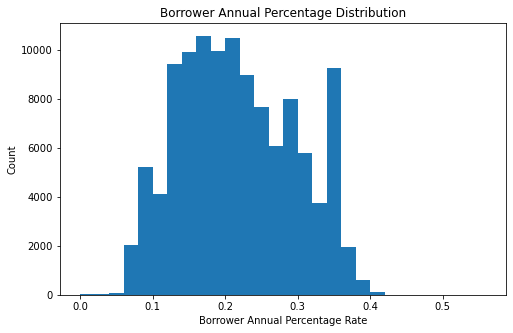

In [27]:
# start with a standard-scaled plot
bins = np.arange(0, loan_cols['BorrowerAPR'].max()+0.05, 0.02)

plt.figure(figsize=[8, 5])
plt.hist(data = loan_cols, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower Annual Percentage Rate')
plt.ylabel('Count')
plt.title('Borrower Annual Percentage Distribution')
plt.show()


In [28]:
loan_cols.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

### Distribution of Loan Original Amount

The distribution is skewed to the right with various large spikes in frequency at 10k, 15k,20k and 25k. The distribution also has a long tail,I so will plot on a log scale.

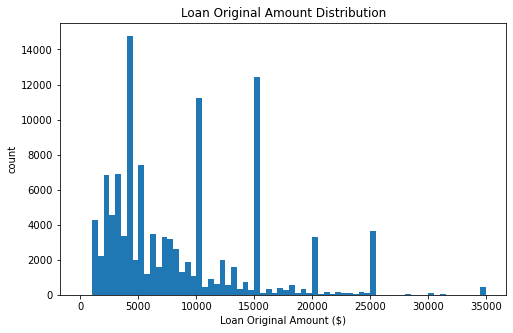

In [30]:
#Loan Original Amount Distribution
bins = np.arange(0, loan_cols['LoanOriginalAmount'].max()+500, 500)
plt.figure(figsize =(8,5))
plt.hist(data = loan_cols, x = 'LoanOriginalAmount', bins = bins)
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

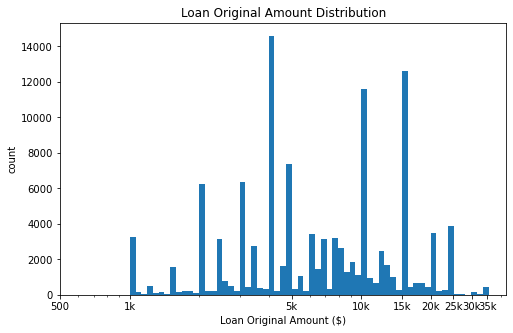

In [6]:
#log scale distribution
log_binsize = 0.025
bins = 10** np.arange(3, np.log10(loan_cols['LoanOriginalAmount'].max())+log_binsize, log_binsize)

#set plotsize
plt.figure(figsize =(8, 5))
plt.hist(data = loan_cols, x= 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 5e3,1e4, 15e3, 2e4, 25e3, 3e4, 35e3],[500,'1k','5k','10k','15k','20k','25k','30k','35k'])
plt.title('Loan Original Amount Distribution')
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('count')
plt.show()

The highest Loan Original Amount is around 4500 dollars and the very large spikes at 10k, 15k, 20k and 25k Loan Amounts.

Distribution of other variables of interest.

### Distribution of Loan Term

Most of the loans have a duration of 36 months and most of the borrowers are Employed. C has the highest ProsperRating with most of the ratings ranging between C and A.

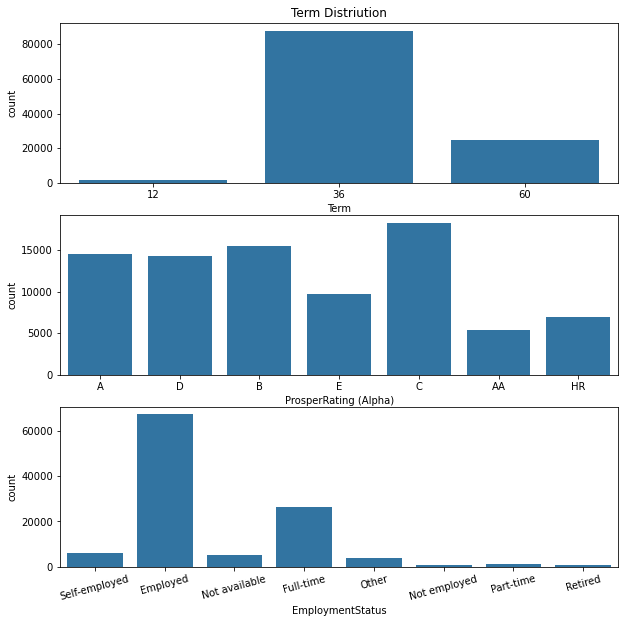

In [9]:
#distribution of term(The length of the loan expressed in months), ProsperRating and EmployementStatus
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

default_color = sb.color_palette()[0]
sb.countplot(data = loan_cols, x = 'Term', color = default_color, ax = ax[0]).set(title = 'Term Distriution')
sb.countplot(data = loan1, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = loan_cols, x = 'EmploymentStatus', color = default_color, ax = ax[2])
plt.xticks(rotation=15)

plt.show()

### Distribution of StatedMonthlyIncome

The distribution is skewed to the right with most of the Stated Montly Income ranging between 0 and 18,000 and the highest point at around 5000.

In [11]:
#StatedMontlyIncome
loan_cols.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

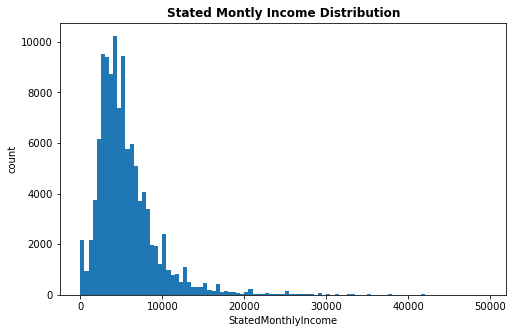

In [73]:
#StatedMonthlyIncome distribution
bins_x = np.arange(0, 50000, 500)
plt.figure(figsize = (8,5))

plt.hist(data = loan_cols, x= 'StatedMonthlyIncome', bins = bins_x);
plt.title('Stated Montly Income Distribution', fontweight = 'bold')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('count')

plt.show()

The distribution is skewed to the right with most of the Stated Montly Income ranging between 0 and 18,000 and the highest point at around 5000.

### Distribution of Prosper Score
Propser Score distribution is normal with highest score at point 4,6 and 8.

In [27]:
loan_cols['ProsperScore'].describe() #ProsperScore - custom risk score range 1-10(10 being best or lowest risk score)

count    84853.000000
mean         5.950067
std          2.376501
min          1.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: ProsperScore, dtype: float64

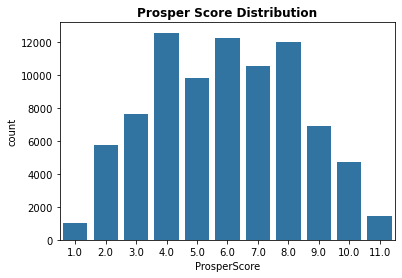

In [72]:
#ProsperScore Distribution

default_color = sb.color_palette()[0]
sb.countplot(data = loan_cols, x = 'ProsperScore', color = default_color)
plt.title('Prosper Score Distribution', fontweight = 'bold');


Propser Score distribution is normal with highest score at point 4,6 and 8.

### Distribution of Income Range

The income range distribution is skewed to the right with most of the borrowers' income ranging between 25000 and 49999 dollars.

In [53]:
loan_cols.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

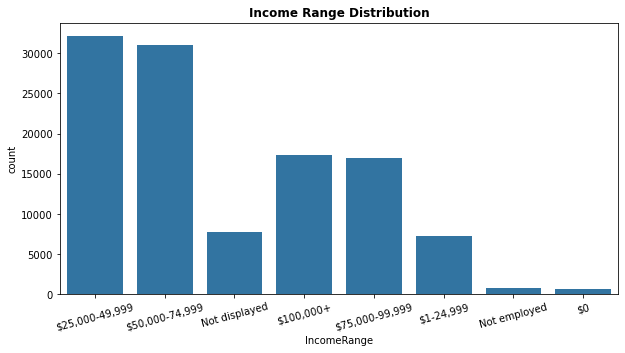

In [76]:
#IncomeRange Distribution
plt.figure(figsize =(10, 5))
base_color = sb.color_palette()[0]
sb.countplot(data = loan_cols, x = 'IncomeRange', color = base_color)
plt.title('Income Range Distribution', fontweight = 'bold')
plt.xticks(rotation= 15);


The income range distribution is skewed to the right with most of the borrowers' income ranging between 25000 and 49999 dollars.

In [78]:
#Monthly loan payment
loan_cols.MonthlyLoanPayment.describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

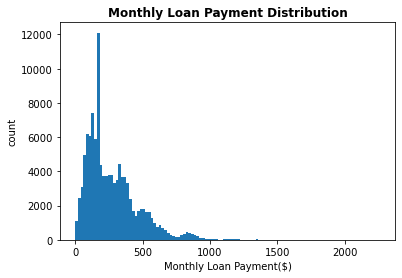

In [10]:
#MonthlyLoanPayment distribution
bins = np.arange(0, loan_cols['MonthlyLoanPayment'].max()+10, 20)
plt.hist(data = loan_cols, x = 'MonthlyLoanPayment', bins = bins)
plt.title('Monthly Loan Payment Distribution', fontweight = 'bold')
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('count');

- Since the distribution has a long tail we investigate further on a log-scale.

### Distribution of Monthly Loan Payment 

In this log scale distribution shows a large spike in frequency at around 150 and 200 and the frequecy trails off until it the next spike which is between 300-400.

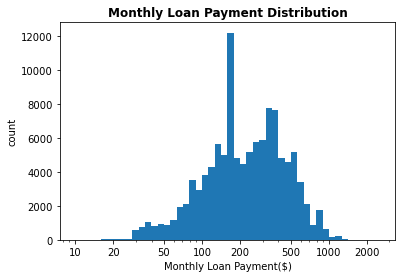

In [103]:
#log scale distribution 
log_binsize = 0.05
bins =10 ** np.arange(1, np.log10(loan_cols['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.hist(data = loan_cols, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 5e2, 1e3, 2e3],['10','20','50','100','200','500','1000','2000'])
plt.title('Monthly Loan Payment Distribution', fontweight = 'bold')
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('count');

In this log scale distribution shows a large spike in frequency at around 150 and 200 and the frequecy trails off until it the next spike which is between 300-400.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Loan Original Amount variable took on a large range of values, so I plotted the data on a log scale. Monthly loan Payment is also another variable that looked at using log scale. The distribution of the Monthly Loan payment looked normal with the peak between \$150 and \$200.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the Loan Original Amount and Monthly Loan Payment their distribution had a long tail therefore looked over on a log scale to display the qualities. 

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [75]:
loan_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   ClosedDate                 55089 non-null   object 
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   LenderYield                113937 non-null  float64
 7   ProsperRating (Alpha)      84853 non-null   object 
 8   ProsperScore               84853 non-null   float64
 9   ListingCategory (numeric)  113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  Occupation                 110349 non-null  object 
 12  EmploymentStatus           111682 non-null  object 
 13  AmountDelinquent           10

In [8]:
numeric_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR']
categoric_vars = ['Term', 'ProsperRating (Alpha)','EmploymentStatus']

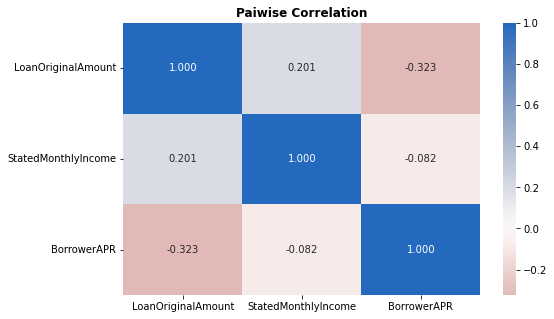

In [18]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(loan_cols[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Paiwise Correlation', fontweight = 'bold')
plt.show()

In [6]:
columns = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus']
loan1 = loans[columns]

In [19]:
#converting Prosper Rating(Alpha) and Employment Status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loan1['ProsperRating (Alpha)'] = loan1['ProsperRating (Alpha)'].astype(ordered_var)

employ_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = employ_order)
loan1['EmploymentStatus'] = loan1['EmploymentStatus'].astype(ordered_var)

In [15]:
#Remove outlier in StatesMonthlyincome 
loan1 = loan1[loan1.StatedMonthlyIncome<=30000]

Relationship between the numerical variables.

In [16]:
#select a sample of 5000 loans
loan1_samp = loan1.sample(5000)

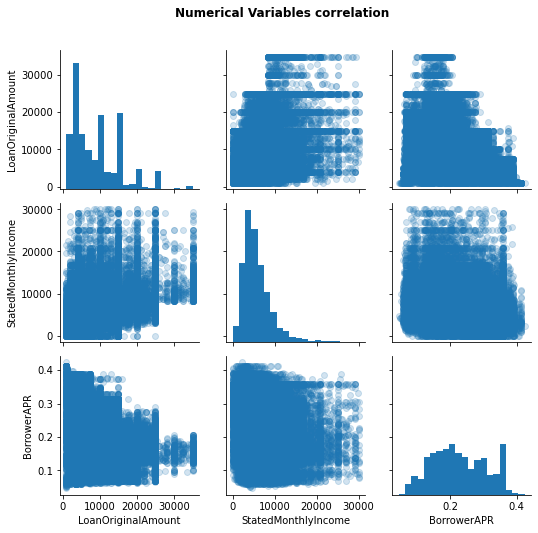

In [17]:
g = sb.PairGrid(loan1.dropna(), vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter, alpha=0.2);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Numerical Variables correlation', fontweight = 'bold');

The correlation between LoanOriginalAmount and BorrowerAPR is a negative -0.323 which is shown on the scatterplot and concludes that for an increased amount of LoanOriginalAmount will result to a reduced BorrowerAPR.

There is a positive correlation between StatedMonthlyIncome and LoanOriginalAmount of 0.201 and indication of an increase monthly income will contribute to borrowing more money.

### Numerical Variables vs Categorical Features
Relationship between the BorrowerAPR, StatedMonthlyIncome and LoanOriginalAmount correlation with the categorical features.

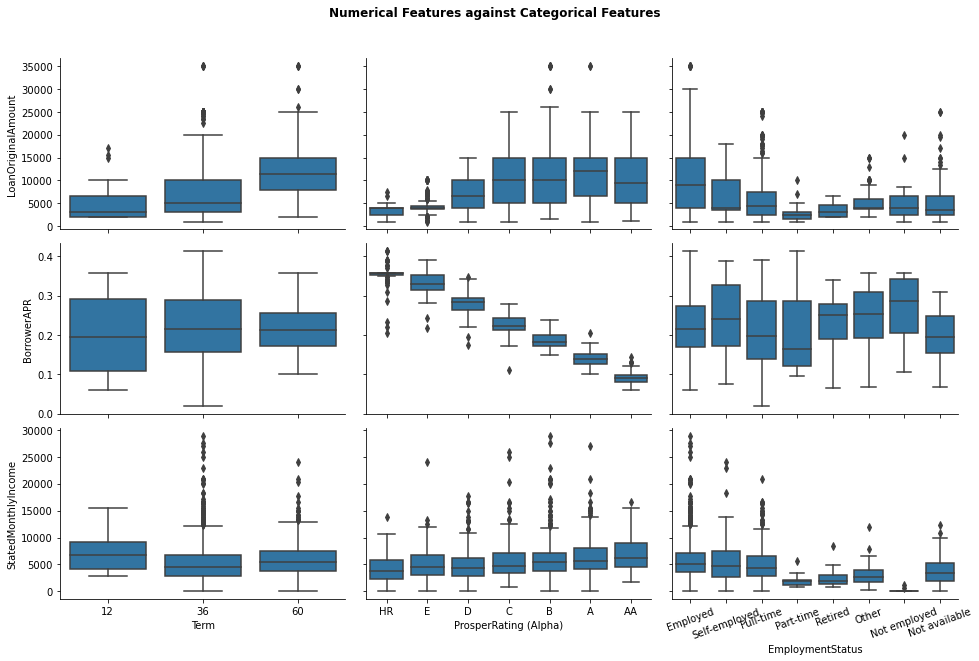

In [28]:
# plot matrix of numeric features against categorical features.

loan1_samp = loan1.sample(n=2000, replace = False)
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color);
g = sb.PairGrid(data = loan1_samp, y_vars = ['LoanOriginalAmount', 'BorrowerAPR','StatedMonthlyIncome'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation = 20)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Numerical Features against Categorical Features', fontweight = 'bold');
plt.show();

The Loan Original Amount increases as the term of the loan increases. The Borrower APR decreases with a better ProsperRating (Alpha) shown on the boxgrid. This is displayed on the BorrowerAPR distribution having two loans with a high frequency. 

### Relationship between the categorical features. 

There isn't much interaction between Employment Status and Terms and it seems most of the employed borrowers their loan length is in 60 months.There are slightly larger interactions on the Prosper Rating (Alpha), especially the B and C ratings and clearly show the term of the loans is 60 months.

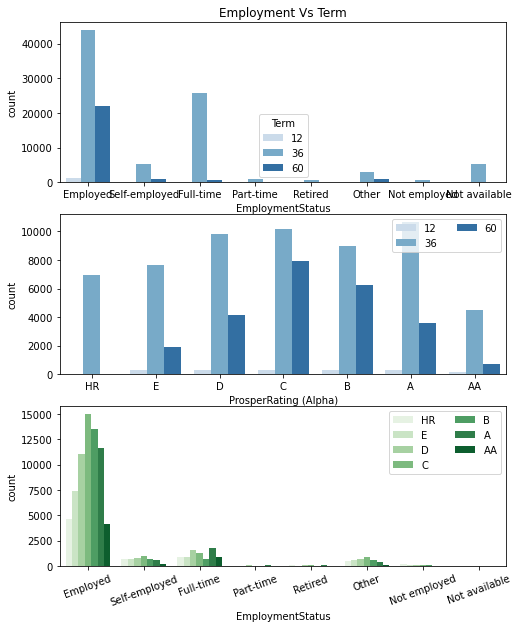

In [23]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 10])

# subplot 1: Employment vs Term
plt.subplot(3, 1, 1)
sb.countplot(data = loan1, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues').set(title='Employment Vs Term')

# subplot 2: ProsperRating (Alpha) vs. Term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loan1, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loan1, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation = 20)
plt.show()

There isn't much interaction between Employment Status and Terms and it seems most of the employed borrowers their loan length is in 60 months.There are slightly larger interactions on the Prosper Rating (Alpha), especially the B and C ratings and clearly show the term of the loans is 60 months. 

No much interaction between the Employment Status and Prosper Rating (Alpha) with some of the employment status having inadequate data. Employed borrowers have B and C ratings, A and D following closely.

### Loan Original Amount vs Borrower Rate

The plot shows a negative correlation between the two variable. As the value of the Loan Original Amount increases the Borrower Annual Percentage Rate seem to be decreasing.

Realtionship between Loan Original Amount and Borrower APR(Annual Percentage Rate) for the loan.

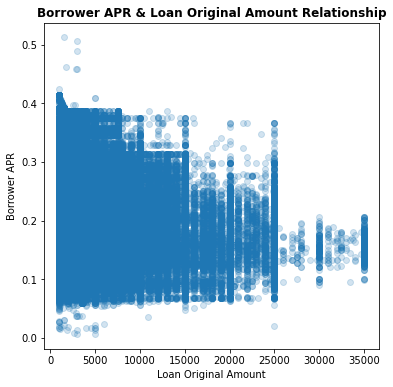

In [161]:
plt.figure(figsize =(6, 6))

plt.scatter(data = loan_cols, x= 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 0.2)
plt.title('Borrower APR & Loan Original Amount Relationship', fontweight = 'bold')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')

plt.show()

The plot shows a negative correlation between the two variable. As the value of the Loan Original Amount increases the Borrower Annual Percentage Rate seem to be decreasing.

### Income Range vs Loan Original Amount

The violin plot shows the relationship between Loan Original Amount and Income range. $100,000+ Income Range has the highest median point and is distributed in the loanOriginalAmount.

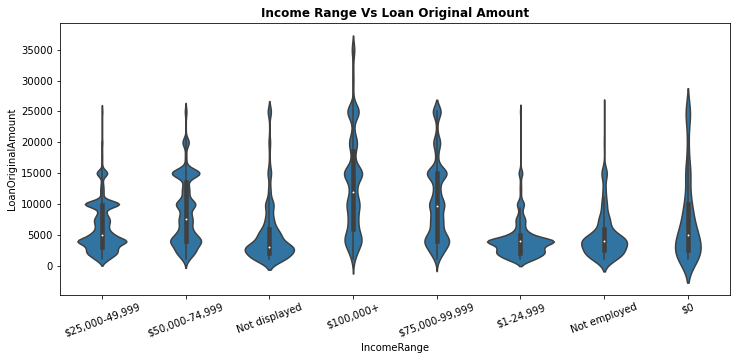

In [44]:
#Relationship between LoanOriginalAmount and IncomeRange
plt.figure(figsize = (12, 5))
base_color = sb.color_palette()[0]

sb.violinplot(data = loan_cols, x ='IncomeRange', y = 'LoanOriginalAmount', color = base_color)
plt.title('Income Range Vs Loan Original Amount', fontweight = 'bold')
plt.xticks(rotation = 20);

The violin plot shows the relationship between Loan Original Amount and Income range. $100,000+ Income Range has the highest median point and is distributed in the loanOriginalAmount.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The Loan Original Amount has a negative correlation with BorrowerAPR which means an increased amount of LoanOriginalAmount will result to a less BorrowerAPR.

StatedMonthlyIncome and LoanOriginalAmount  have a positive correlation which indicates that an increase monthly income will contribute to an increased Loan Original Amount.

There was also an interesting relationship observed between the BorrowerAPR and the ProsperRating (Alpha). While the BorrowerAPR increase its ProsperRating decreases to a better quality.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The Loan Original Amount increases as the term of the loan increases.



## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the employment status,Term and the ProsperRating, play into the relationship between Loan Original Amount and Borrower APR.

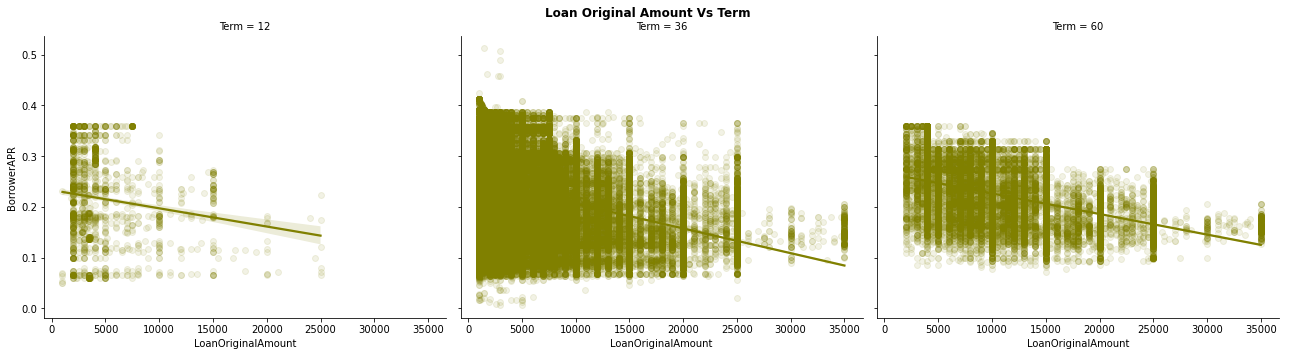

In [45]:
g=sb.FacetGrid(data=loan1, aspect=1.2, height=5, col='Term', col_wrap=3)
g=g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.1,color = 'olive', scatter_kws={'alpha':0.1});
g.add_legend();
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Loan Original Amount Vs Term', fontweight = 'bold');

The Borrower APR decreases with the increase of the Loan Original Amount for all the Loan Terms. 

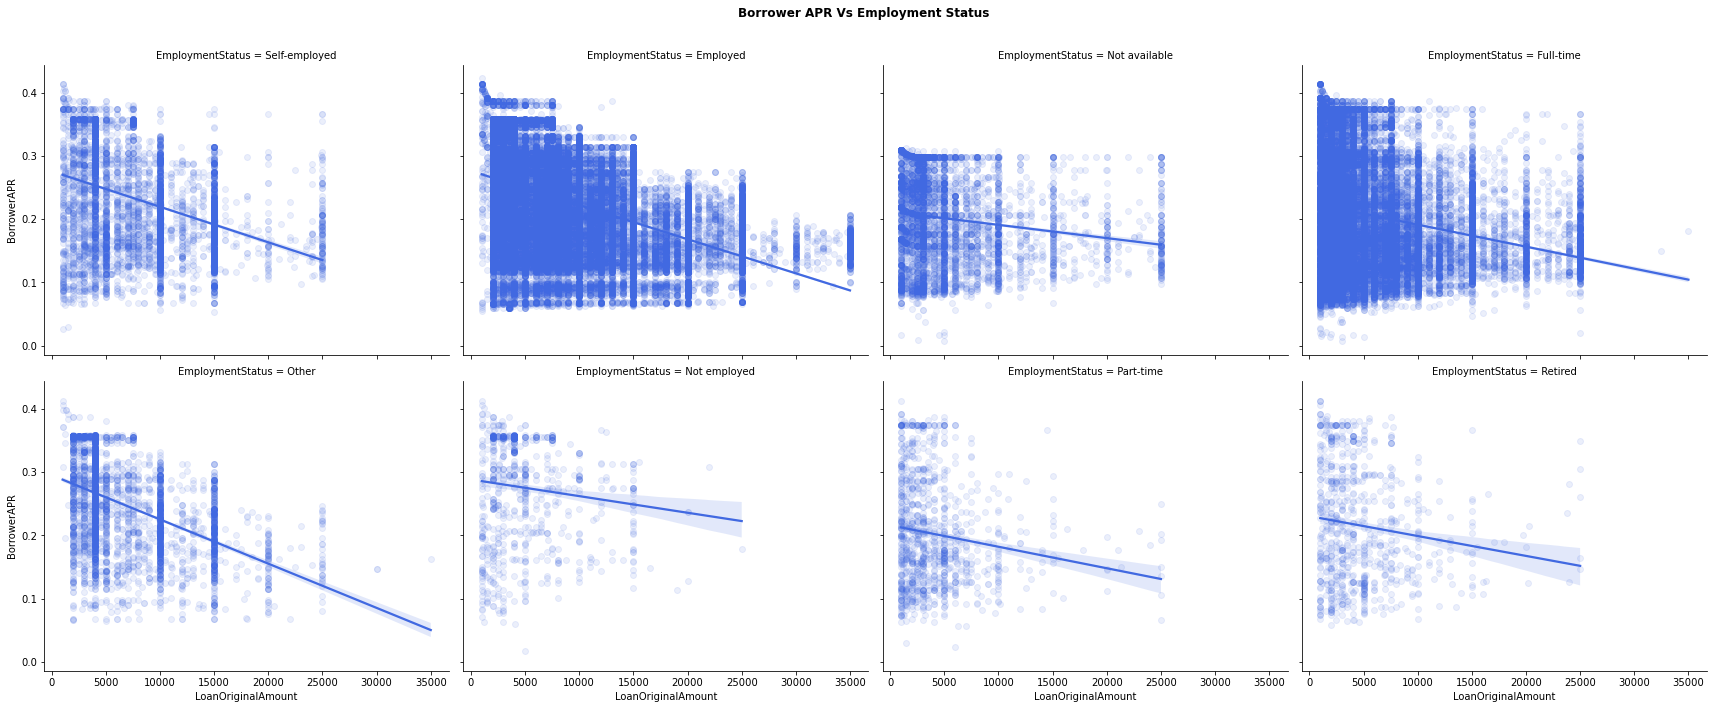

In [46]:
g=sb.FacetGrid(data=loan1, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=4)
g=g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04,color = 'royalblue', scatter_kws={'alpha':0.1});
g.add_legend();
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR Vs Employment Status', fontweight = 'bold');

The Borrower APR decrease as the Loan Original Amount increases in all Employment Status.

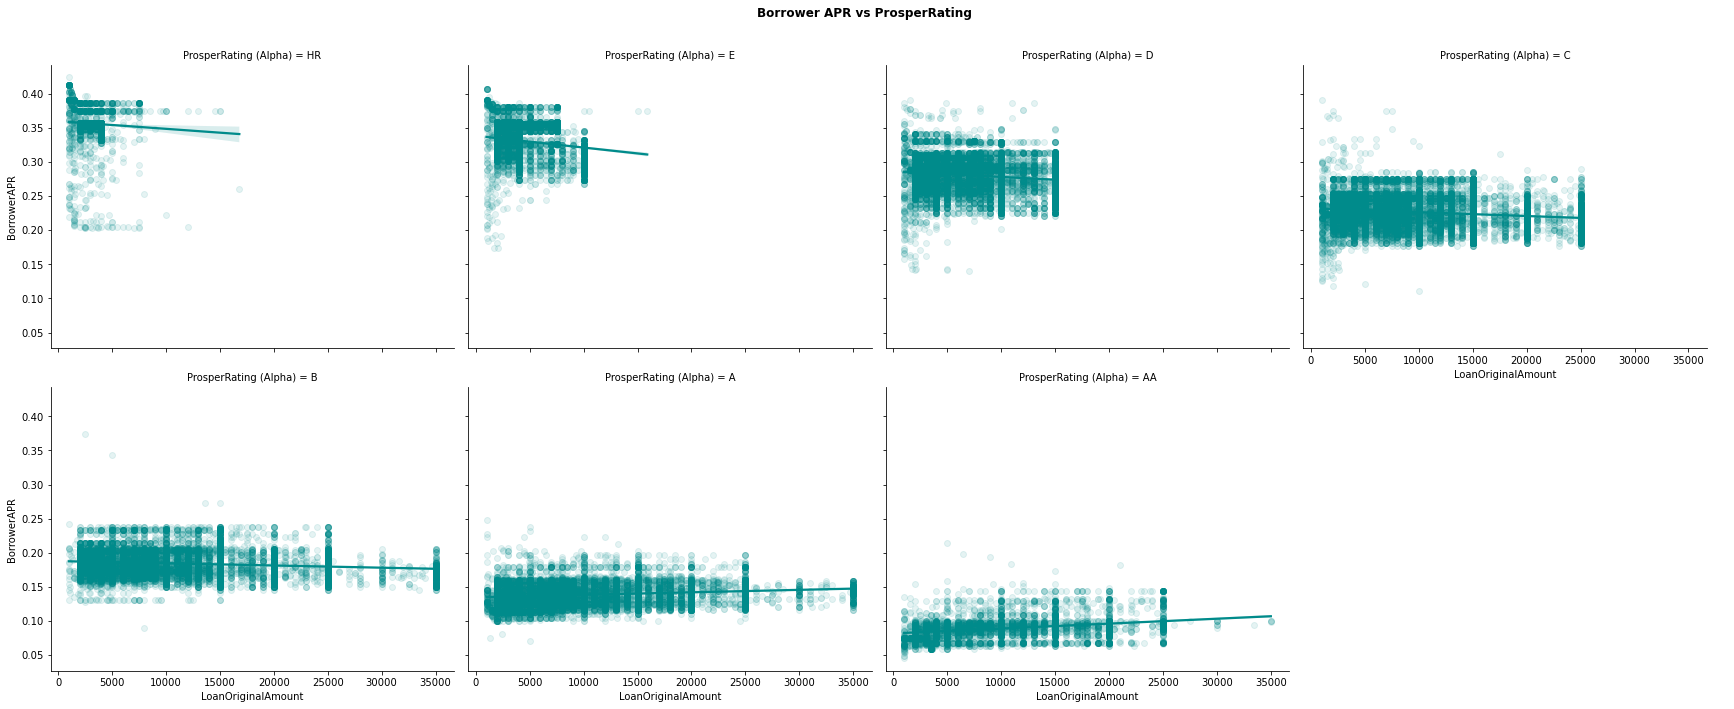

In [68]:
g=sb.FacetGrid(data=loan1, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g=g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05,color = 'darkcyan', scatter_kws={'alpha':0.1});
g.add_legend();
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower APR vs ProsperRating', fontweight = 'bold');

In [5]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanOriginalAmount     113937 non-null  int64  
 1   BorrowerAPR            113912 non-null  float64
 2   StatedMonthlyIncome    113937 non-null  float64
 3   Term                   113937 non-null  int64  
 4   ProsperRating (Alpha)  84853 non-null   object 
 5   EmploymentStatus       111682 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 5.2+ MB


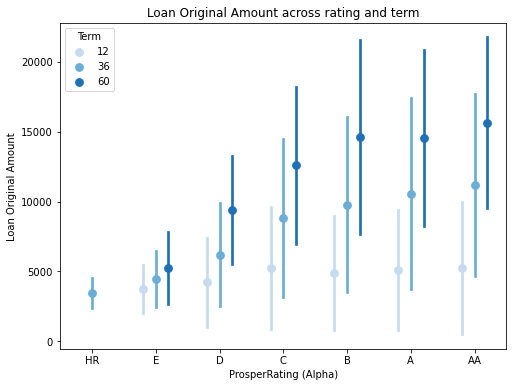

In [67]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loan_cols, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Loan Original Amount across rating and term')
plt.ylabel('Loan Original Amount')
ax.set_yticklabels([],minor = True);

As the Loan Original Amount increases the Loan Term increases and get to a better the Prosper Rating which is AA.

### Loan Original Amount vs Borrower Rate vs Term

From the plot, it's clear that as the Loan Original Amount Increase the Borrower APR decreases and the most loan term is 60 months.

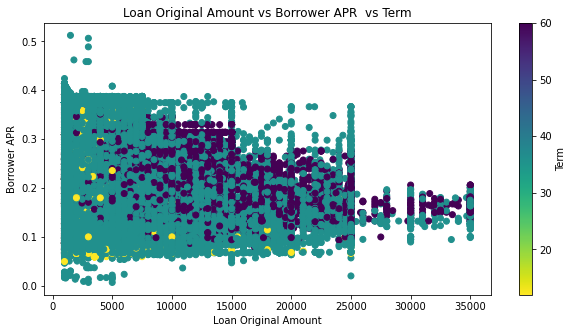

In [58]:
# Loan Original Amount vs Borrower APR  vs Term
plt.figure(figsize = [10, 5])
plt.scatter(data=loan_cols,x='LoanOriginalAmount',y = 'BorrowerAPR',c='Term',cmap = 'viridis_r')
plt.colorbar(label = 'Term');
plt.title('Loan Original Amount vs Borrower APR  vs Term');
plt.xlabel('Loan Original Amount');
plt.ylabel('Borrower APR');

From the plot, it's clear that as the Loan Original Amount Increase the Borrower  APR decreases and the most loan term is 60 months.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The Borrower APR decreases with the increase of the Loan Original Amount for all the Loan Terms. The Borrower APR decrease as the Loan Original Amount increases in all Employment Status.


### Were there any interesting or surprising interactions between features?

Looking back on the point plots, it does seem like there's a systematic interaction effect between Borrower APR and the Loan Original Amount.


##  Thank You 

In [ ]:
!jupyter nbconvert Loan_Data_Exploration.ipynb --to slides --post serve --no-input --no-prompt